In [1]:
# Import Libraries
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt


In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [3]:
# Class names are not included
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [4]:
# Training Data
train_images.shape

(60000, 28, 28)

There are 60,000 images, each images is a 28 x 28 numpy array consisting of pixel values from 0 to 255.

In [5]:
# Pixel Values fall between 0 to 255, We need to scale them between 0 to 1
train_images = train_images / 255.0
test_images = test_images / 255.0

<function matplotlib.pyplot.show(close=None, block=None)>

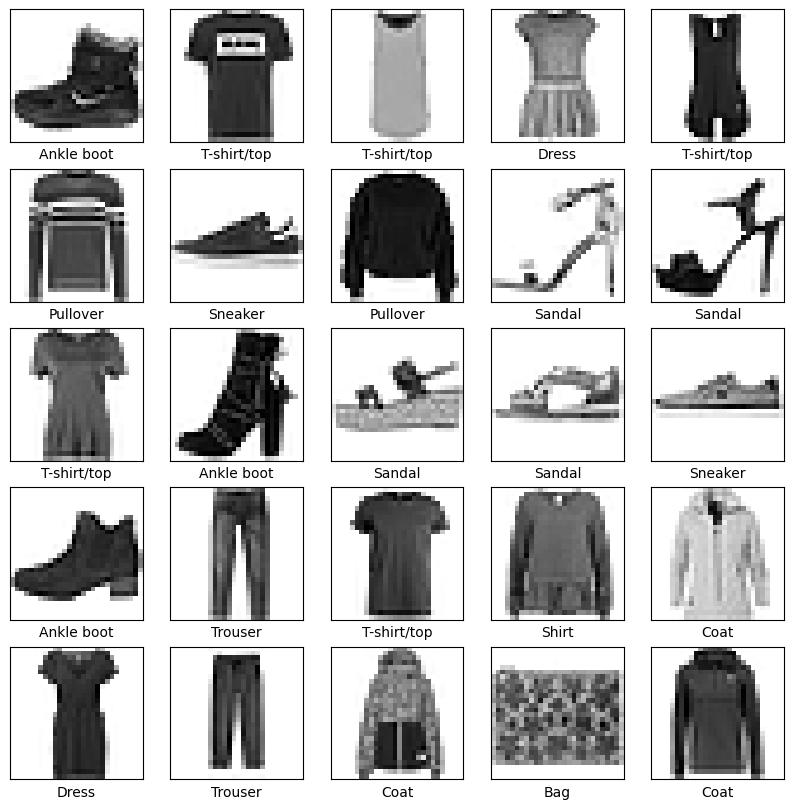

In [6]:
# Verify data is in correct format
plt.figure(figsize = (10, 10))
for i in range(25):
  plt.subplot(5, 5, i + 1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i], cmap = plt.cm.binary)
  plt.xlabel(class_names[train_labels[i]])
plt.show

To build the model, we first configure the layers of the model and then compile the model.

In [7]:
# Set up Layers
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28, 28)),
    tf.keras.layers.Dense(128, activation = 'relu'),
    tf.keras.layers.Dense(10)
])
# Flatten transforms two 2D images array into 1D
# Dense layers are fully connected neural layers.

In [8]:
# Compile the model
model.compile(optimizer = 'adam', loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),metrics = ['accuracy'])

In [9]:
# Train the model
model.fit(train_images, train_labels, epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 1s 636us/step - loss: 0.4962 - accuracy: 0.8246
Epoch 2/10
1875/1875 [==============================] - 1s 657us/step - loss: 0.3742 - accuracy: 0.8649
Epoch 3/10
1875/1875 [==============================] - 1s 650us/step - loss: 0.3365 - accuracy: 0.8774
Epoch 4/10
1875/1875 [==============================] - 1s 600us/step - loss: 0.3116 - accuracy: 0.8856
Epoch 5/10
1875/1875 [==============================] - 1s 653us/step - loss: 0.2934 - accuracy: 0.8921
Epoch 6/10
1875/1875 [==============================] - 1s 605us/step - loss: 0.2801 - accuracy: 0.8963
Epoch 7/10
1875/1875 [==============================] - 1s 597us/step - loss: 0.2678 - accuracy: 0.9003
Epoch 8/10
1875/1875 [==============================] - 1s 605us/step - loss: 0.2570 - accuracy: 0.9047
Epoch 9/10
1875/1875 [==============================] - 1s 666us/step - loss: 0.2469 - accuracy: 0.9079
Epoch 10/10
1875/1875 [==============================] - 1s 622u

In [10]:
# Test the accuracy on test data
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose = 2)
print("\n Test accuracy = ", test_acc)

313/313 - 0s - loss: 0.3360 - accuracy: 0.8869 - 175ms/epoch - 559us/step

 Test accuracy =  0.886900007724762


Model is now trained, let's try making prediction on images

In [11]:
# Convert logits to probability values using softmax
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])

In [12]:
predictions = probability_model.predict(test_images)

313/313 [==============================] - 0s 331us/step


In [13]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

Model has made its predictions, let us visualize its predictions.

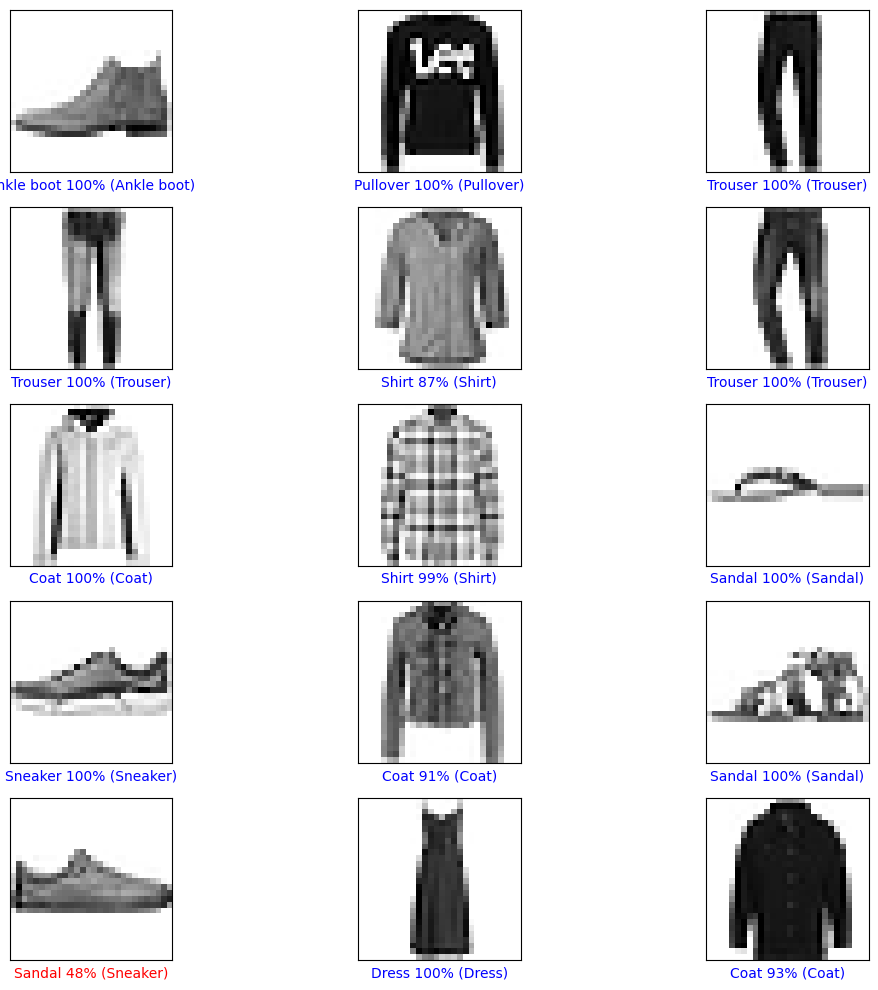

In [14]:
# Let us plot the predictions, red means incorrect while blue means correct prediction.
rows = 5
cols = 3
total_images = rows * cols
plt.figure(figsize = (2*2*cols, 2*rows))
for i in range(total_images):
  plt.subplot(rows, cols, i + 1)
  plot_image(i, predictions[i], test_labels, test_images)
plt.tight_layout()
plt.show()